In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn

import transformers
from transformers import BertTokenizer, BertForSequenceClassification

In [2]:
url_df_read = pd.read_csv('url_df.csv', index_col=[0])
url_df_read

,URL_link
0,https://dq06ugkuram52.cloudfront.net/files/637...
1,https://dq06ugkuram52.cloudfront.net/files/635...
2,https://dq06ugkuram52.cloudfront.net/files/637...
3,https://dq06ugkuram52.cloudfront.net/files/635...
4,https://dq06ugkuram52.cloudfront.net/files/635...
...,...
1867,https://dq06ugkuram52.cloudfront.net/files/730...
1868,https://dq06ugkuram52.cloudfront.net/files/730...
1869,https://dq06ugkuram52.cloudfront.net/files/730...
1870,https://dq06ugkuram52.cloudfront.net/files/730...


In [3]:
MSR_df_read = pd.read_csv('MSR_text_2.csv', index_col=[0])
MSR_df_read

,Text
0,10/19/2020\n\nSlavery and Human trafﬁcking | S...
1,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...
2,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...
3,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...
4,Charles Wells Ltd \n \nModern Slavery and Huma...
...,...
1867,\n\n \nModern Slavery Act 2015 Statement \n...
1868,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...
1869,\n\nSlavery and Human Trafficking Transparenc...
1870,Reward Gateway Slavery\nand Human Trafficking\...


In [4]:
df_csv_joined = pd.read_csv('df_csv_joined', index_col=[0])
df_csv_joined

,Answer ID,Answer Page,Metric,Company,Value,Source Page,Text,URL_link
0,6382834,https://wikirate.org/~6382834,Walk Free Foundation+MSA whistleblowing mechan...,S A Brain Company Ltd,"Whistleblower protection (direct employees), W...",https://wikirate.org/~6375302,10/19/2020\n\nSlavery and Human trafﬁcking | S...,https://dq06ugkuram52.cloudfront.net/files/637...
1,6368402,https://wikirate.org/~6368402,Walk Free Foundation+MSA whistleblowing mechan...,Pension Protection Fund,"Whistleblower protection (direct employees), I...",https://wikirate.org/~6355100,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...,https://dq06ugkuram52.cloudfront.net/files/635...
2,6380781,https://wikirate.org/~6380781,Walk Free Foundation+MSA whistleblowing mechan...,Hall & Woodhouse Limited,Whistleblower protection (direct employees),https://wikirate.org/~6375083,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...,https://dq06ugkuram52.cloudfront.net/files/637...
3,6364508,https://wikirate.org/~6364508,Walk Free Foundation+MSA whistleblowing mechan...,Greene King,Whistleblower protection (direct employees),https://wikirate.org/~6357513,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...,https://dq06ugkuram52.cloudfront.net/files/635...
4,6379525,https://wikirate.org/~6379525,Walk Free Foundation+MSA whistleblowing mechan...,Charles Wells,Whistleblower protection (direct employees),https://wikirate.org/~6354153,Charles Wells Ltd \n \nModern Slavery and Huma...,https://dq06ugkuram52.cloudfront.net/files/635...
...,...,...,...,...,...,...,...,...
1713,7311793,https://wikirate.org/~7311793,Walk Free Foundation+MSA whistleblowing mechan...,ECO Animal Health Group Plc,No,https://wikirate.org/~7307585,\n\n \nModern Slavery Act 2015 Statement \n...,https://dq06ugkuram52.cloudfront.net/files/730...
1714,7310878,https://wikirate.org/~7310878,Walk Free Foundation+MSA whistleblowing mechan...,Victoria Plum Limited,No,https://wikirate.org/~7307593,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...,https://dq06ugkuram52.cloudfront.net/files/730...
1715,7310802,https://wikirate.org/~7310802,Walk Free Foundation+MSA whistleblowing mechan...,Creagh Concrete Products Limited,Whistleblower protection (direct employees),https://wikirate.org/~7307608,\n\nSlavery and Human Trafficking Transparenc...,https://dq06ugkuram52.cloudfront.net/files/730...
1716,7311831,https://wikirate.org/~7311831,Walk Free Foundation+MSA whistleblowing mechan...,Reward Gateway (UK) Ltd,"Hotline (direct employees), Whistleblower prot...",https://wikirate.org/~7307616,Reward Gateway Slavery\nand Human Trafficking\...,https://dq06ugkuram52.cloudfront.net/files/730...


In [5]:
# change 'Value' to 1 or 0

from re import search

Value_list = []
for i in range(len(df_csv_joined)):
    if search('(No|no)', df_csv_joined['Value'][i]):
        Value_list.append(0)
    else:
        Value_list.append(1)

Value_df = pd.DataFrame(Value_list, columns= ['Value'])

df_csv_joined['Value'] = Value_df
df_csv_joined

,Answer ID,Answer Page,Metric,Company,Value,Source Page,Text,URL_link
0,6382834,https://wikirate.org/~6382834,Walk Free Foundation+MSA whistleblowing mechan...,S A Brain Company Ltd,1,https://wikirate.org/~6375302,10/19/2020\n\nSlavery and Human trafﬁcking | S...,https://dq06ugkuram52.cloudfront.net/files/637...
1,6368402,https://wikirate.org/~6368402,Walk Free Foundation+MSA whistleblowing mechan...,Pension Protection Fund,1,https://wikirate.org/~6355100,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...,https://dq06ugkuram52.cloudfront.net/files/635...
2,6380781,https://wikirate.org/~6380781,Walk Free Foundation+MSA whistleblowing mechan...,Hall & Woodhouse Limited,1,https://wikirate.org/~6375083,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...,https://dq06ugkuram52.cloudfront.net/files/637...
3,6364508,https://wikirate.org/~6364508,Walk Free Foundation+MSA whistleblowing mechan...,Greene King,1,https://wikirate.org/~6357513,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...,https://dq06ugkuram52.cloudfront.net/files/635...
4,6379525,https://wikirate.org/~6379525,Walk Free Foundation+MSA whistleblowing mechan...,Charles Wells,1,https://wikirate.org/~6354153,Charles Wells Ltd \n \nModern Slavery and Huma...,https://dq06ugkuram52.cloudfront.net/files/635...
...,...,...,...,...,...,...,...,...
1713,7311793,https://wikirate.org/~7311793,Walk Free Foundation+MSA whistleblowing mechan...,ECO Animal Health Group Plc,0,https://wikirate.org/~7307585,\n\n \nModern Slavery Act 2015 Statement \n...,https://dq06ugkuram52.cloudfront.net/files/730...
1714,7310878,https://wikirate.org/~7310878,Walk Free Foundation+MSA whistleblowing mechan...,Victoria Plum Limited,0,https://wikirate.org/~7307593,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...,https://dq06ugkuram52.cloudfront.net/files/730...
1715,7310802,https://wikirate.org/~7310802,Walk Free Foundation+MSA whistleblowing mechan...,Creagh Concrete Products Limited,1,https://wikirate.org/~7307608,\n\nSlavery and Human Trafficking Transparenc...,https://dq06ugkuram52.cloudfront.net/files/730...
1716,7311831,https://wikirate.org/~7311831,Walk Free Foundation+MSA whistleblowing mechan...,Reward Gateway (UK) Ltd,1,https://wikirate.org/~7307616,Reward Gateway Slavery\nand Human Trafficking\...,https://dq06ugkuram52.cloudfront.net/files/730...


In [6]:
import nltk
import re #regular expression
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_eng = stopwords.words('english')
stopwords_eng.append('br')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charissayu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charissayu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
stem_sentence_corpus = torch.load('stem_sentence_corpus')

In [9]:
data_tensor = torch.load('data_tensor_fnl')

#### I Tensor

In [10]:
I_tensor1 = torch.load('I_tensor')
I_tensor1.shape

torch.Size([1718, 1, 200])

### Model training

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [12]:
label = df_csv_joined['Value'].tolist()

train_x = data_tensor[:1400]
train_y = torch.tensor(label[:1400])
train_i = I_tensor1[:1400]

val_x = data_tensor[1400:1600]
val_y = torch.tensor(label[1400:1600])
val_i = I_tensor1[1400:1600]

test_x = data_tensor[1600:]
test_y = torch.tensor(label[1600:])
test_i = I_tensor1[1600:]

In [13]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_x, train_y, train_i)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(val_x, val_y, val_i)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size, shuffle=True)

In [14]:
class CNN(nn.Module):

    def __init__(self):
        
        super(CNN, self).__init__()
                        
        self.conv1 = nn.Conv1d(in_channels = 768, out_channels=1, kernel_size=1, stride=1, padding=0)
        
        #self.fc = nn.Linear(768,2)
        
        self.fc = nn.Linear(153600,2)
        
        self.softmax = nn.Softmax(dim=-1)
        
        self.softmax1 = nn.Softmax(dim=1)
        
        self.dropout = nn.Dropout(0.1)
        
        #self.relu =  nn.ReLU()


    #define the forward pass
    def forward(self, x, y, i):
        
        lbda = 0.25
        
        x = x.permute(0,2,1) #(btch_sz, 200, 768) -> #(btch_sz, 768, 200)(btch_sz, embed_dim, number_sentences)
        
        alpha = self.conv1(x) #(btch_sz, 1, 200)
                
        alpha1 = alpha + lbda * i #(btch_sz, 1, 200) + (btch_sz,1, 200)*(btch_sz, 1, 200) 
                
        alpha_prime = self.softmax(alpha1) #(btch_sz, 1, 200)
                
        #alpha_prime_permute = alpha_prime.permute(0,2,1) #(btch_sz, 200, 1) 
                
        h = torch.mul(x, alpha_prime)  #(btch_sz, 768, 200)*(btch_sz, 200, 1) = (btch_sz, 768, 1)
        
        h = torch.reshape(h, (h.shape[0],-1))
                
        output = self.fc(h)
        
        output = self.softmax1(output)
        
        return output

In [29]:
from sklearn.utils.class_weight import compute_class_weight

classes = torch.unique(train_y).tolist()
y =  train_y.tolist()

class_wts = compute_class_weight('balanced', classes, y)

print(class_wts)

weights = torch.tensor(class_wts, dtype = torch.float)
weights = weights.to(device)

#loss function
#cross_entropy = nn.NLLLoss(weight=weights)

[1.08695652 0.92592593]


In [16]:
from torch import optim

device = torch.device('cpu')

cnn = CNN()

cnn = cnn.to(device)

cross_entropy = nn.CrossEntropyLoss(weight=weights)

from transformers import AdamW

optimizer = optim.AdamW(cnn.parameters(), lr = 0.001, weight_decay=1e-5)

epochs = 50


In [17]:
#from torch.autograd import Variable

def train():
    cnn.train()
    
    total_loss, total_accuracy = 0, 0
    
    total_preds=[]
    
    for step, batch in enumerate(train_dataloader):
        
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        batch = [r.to(device) for r in batch]
 
        x, y, i = batch

        cnn.zero_grad()        

        preds = cnn(x, y, i)

        loss = cross_entropy(preds, y)

        total_loss = total_loss + loss.item()
     
        loss.backward()

        torch.nn.utils.clip_grad_norm_(cnn.parameters(), 1.0)  # clip the the gradients to 1.0, preventing the exploding gradient problem

        optimizer.step()  # update parameters

        preds=preds.detach().cpu().numpy()   # model predictions are stored on GPU. So, push it to CPU
      
        total_preds.append(preds)   # append the model predictions

    avg_loss = total_loss / len(train_dataloader) # compute the training loss of the epoch
  
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds


In [18]:
def evaluate():
    
    print("\nEvaluating...")

    cnn.eval()   # deactivate dropout layers

    total_loss, total_accuracy = 0, 0
  
    total_preds = []  # empty list to save the model predictions

    for step,batch in enumerate(val_dataloader):   # iterate over batches
        
        if step % 50 == 0 and not step == 0:  # Progress update every 50 batches.
            
            #elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        batch = [t.to(device) for t in batch] # push the batch to gpu

        x, y, i = batch
        
        with torch.no_grad(): # deactivate autograd
            
            preds = cnn(x, y, i)
            
            loss = cross_entropy(preds,y)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader) 

    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [19]:
best_valid_loss = float('inf')  # set initial loss to infinite

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

for epoch in range(epochs): #for each epoch
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    train_loss, _ = train() #train model
    
    valid_loss, _ = evaluate() #evaluate model
    
    if valid_loss < best_valid_loss: #save the best model
        best_valid_loss = valid_loss
        torch.save(cnn.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 50

Evaluating...

Training Loss: 0.660
Validation Loss: 0.587

 Epoch 2 / 50

Evaluating...

Training Loss: 0.647
Validation Loss: 0.620

 Epoch 3 / 50

Evaluating...

Training Loss: 0.629
Validation Loss: 0.625

 Epoch 4 / 50

Evaluating...

Training Loss: 0.614
Validation Loss: 0.654

 Epoch 5 / 50

Evaluating...

Training Loss: 0.605
Validation Loss: 0.650

 Epoch 6 / 50

Evaluating...

Training Loss: 0.598
Validation Loss: 0.665

 Epoch 7 / 50

Evaluating...

Training Loss: 0.587
Validation Loss: 0.658

 Epoch 8 / 50

Evaluating...

Training Loss: 0.588
Validation Loss: 0.683

 Epoch 9 / 50

Evaluating...

Training Loss: 0.584
Validation Loss: 0.683

 Epoch 10 / 50

Evaluating...

Training Loss: 0.577
Validation Loss: 0.703

 Epoch 11 / 50

Evaluating...

Training Loss: 0.577
Validation Loss: 0.689

 Epoch 12 / 50

Evaluating...

Training Loss: 0.573
Validation Loss: 0.673

 Epoch 13 / 50

Evaluating...

Training Loss: 0.565
Validation Loss: 0.681

 Epoch 14 / 50

Eval

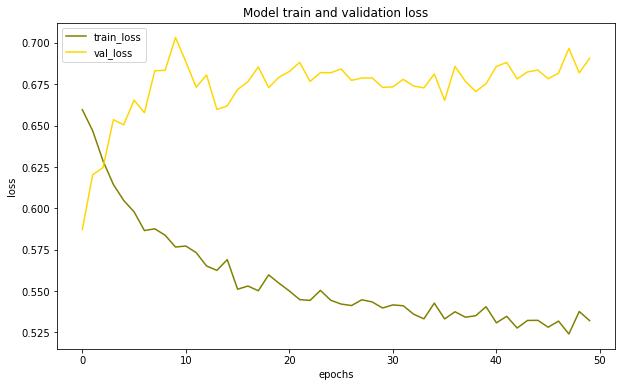

In [21]:
x = list(range(0,50))
plt.figure(figsize=(10,6))
plt.plot(x, train_losses, color='olive')
plt.plot(x, valid_losses, color='gold')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model train and validation loss')
plt.legend(['train_loss', 'val_loss'])

In [22]:
#load weights of best model
path = 'saved_weights.pt'
cnn.load_state_dict(torch.load(path))

<All keys matched successfully>

In [23]:
# get predictions for test data
with torch.no_grad():
    preds = cnn(test_x, test_y, test_i)
    preds = preds.detach().cpu().numpy()

In [24]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.44      0.61        50

    accuracy                           0.44        50
   macro avg       0.50      0.22      0.31        50
weighted avg       1.00      0.44      0.61        50



/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# confusion matrix
cm = pd.crosstab(test_y, preds)
cm

col_0,0,1
row_0,,
1,28,22


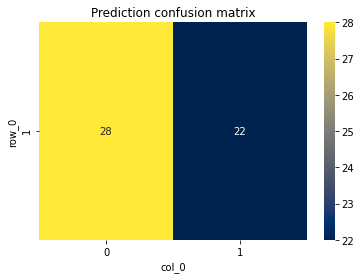

In [26]:
import seaborn as sn
sn.heatmap(cm, annot=True, cmap='cividis')
plt.title('Prediction confusion matrix')
plt.show()